In [1]:
import gc
import numpy as np
import pandas as pd
from tqdm import tqdm

from speech_emotion.plots import *
from keras.models import load_model

from IPython.display import clear_output as jupyter_clear_output

## Plotting Speech Emotion Recognition

In [2]:
predictions = []

In [3]:
def load_model_plot(dataset):
    global predictions

    model = load_model(f"model/{dataset}_model_4.h5")

    x = np.load(f'data/npy/{dataset}_features.npy')
    y = np.load(f'data/npy/{dataset}_labels.npy')

    display_counts(y, dataset)
    predictions.append(
        evaluation_plots(model, x, y, dataset)
    )

    del model, x, y

In [4]:
DATASETS = ["RAVDESS", "CREMA", "TESS", "SAVEE", "EMODB", "IEMOCAP"]
pbar = tqdm(DATASETS)

for i in pbar:
    pbar.set_description("Plotting %s" % i)
    load_model_plot(i)
    gc.collect()

    jupyter_clear_output(wait=True)

Plotting IEMOCAP: 100%|██████████| 6/6 [00:57<00:00,  9.51s/it]


In [23]:
data_preds = {
    i: j for i, j in zip(DATASETS, predictions) if i not in ["CREMA", "TESS", "SAVEE"]
}
colors = ["red", "blue", "green", "orange", "purple", "brown"]

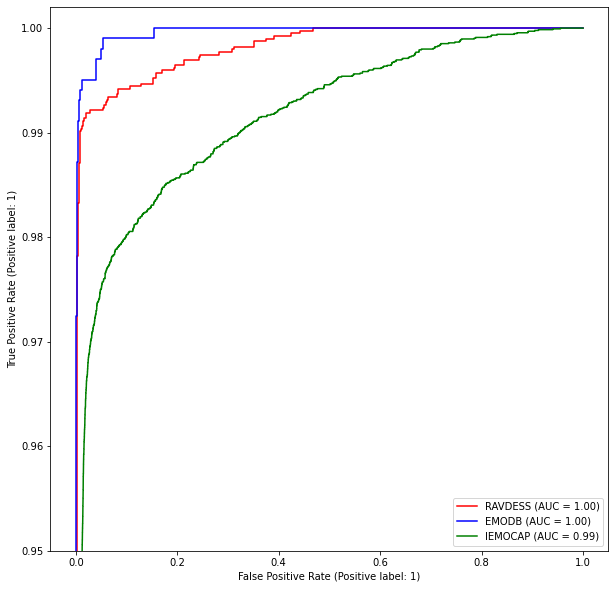

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for (i, y_pred), c in zip(data_preds.items(), colors):
    y_true = np.load(f'data/npy/{i}_labels.npy')
    skmetrics.RocCurveDisplay.from_predictions(
        y_true.ravel(),
        y_pred.ravel(),
        name=i,
        color=c,
        ax=ax
    )

plt.ylim([0.95, 1.002])
plt.legend()
plt.show()
fig.savefig(
    f"./data/plots/full_roc.png",
    bbox_inches="tight",
    dpi=300,
    facecolor='white'
)

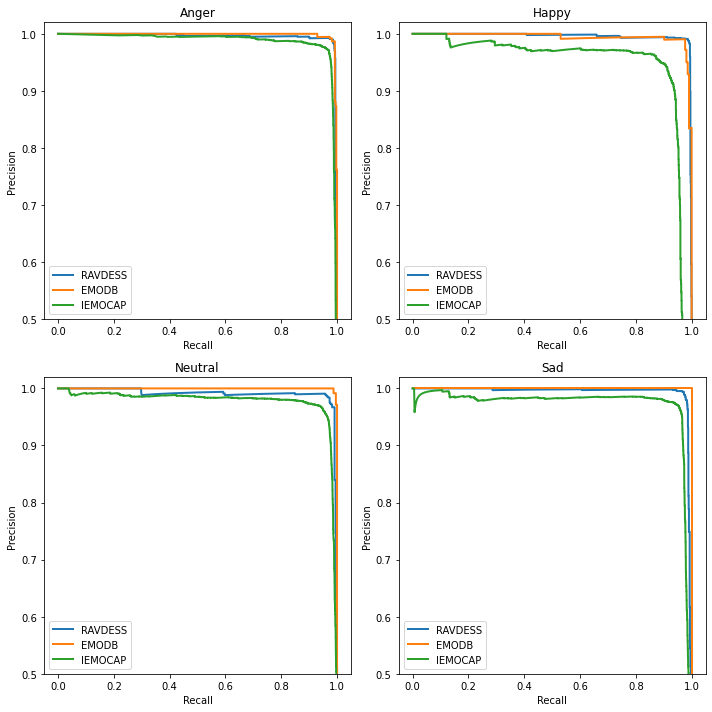

In [31]:
classes = ["Anger", "Happy", "Neutral", "Sad"]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

precision = dict()
recall = dict()
for (dataset, y_pred), c in zip(data_preds.items(), colors):
    y_true = np.load(f'data/npy/{dataset}_labels.npy')
    for i in range(2):
        for j in range(2):
            class_label = i * 2 + j

            precision[class_label], recall[class_label], _ = skmetrics.precision_recall_curve(
                y_true[:, class_label],
                y_pred[:, class_label],

            )
            ax[i][j].plot(
                recall[class_label],
                precision[class_label],
                lw=2,
                label=dataset,
            )

            ax[i][j].set_title(classes[class_label])
            ax[i][j].set_xlabel("Recall")
            ax[i][j].set_ylabel("Precision")
            ax[i][j].set_ylim([0.5, 1.02])
            ax[i][j].legend()

plt.tight_layout()
plt.show()

fig.savefig(
    "./data/plots/full_pr.png",
    bbox_inches="tight",
    dpi=300,
    facecolor='white'
)

In [39]:
precision[3].shape

(13162,)

## Plotting Text Emotion Recognition